In [1]:
#!apt update
!apt install -y cmake
!pip install face_recognition
!pip install pandas==0.24.0
import face_recognition
import glob
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
def change(s):
  return eval(s)

def read_members_frame(features_dir):
  all_features = pd.read_csv(features_dir, index_col=0, encoding = 'utf-8')  
  return all_features
  
def create_member(img_dir, features_dir):
  img_list = glob.glob(img_dir+'/*')
  member_name = os.path.split(img_list[0])[-1].split(".")[0].split("_")[0]
  dummy_coding = [0]*128
  member_features = []
  features_list = read_members_frame(features_dir)
  
  df_index=features_list.columns
  if(df_index.contains(member_name)):
    message = 'member already exists'
    return message
  
  for (i,f) in enumerate(img_list):
    mem_img = face_recognition.load_image_file(f)
    face_encoding = face_recognition.face_encodings(mem_img)
    if face_encoding:
      member_features.append(list(face_encoding[0]))
    else:
      member_features.append(list(dummy_coding))
  
  #create new member feature
  df_cols = features_list.shape[1]
  features_list.insert(df_cols, member_name, member_features)
  
  features_list.to_csv(features_dir, encoding='utf-8')
  message = 'new member created'
  
  
  return message

def resume_all_features(features_list):
  df_cols = features_list.shape[1]
  
  for i in range(1,df_cols):
    current_col = features_list.columns[i]
    features_list[current_col] = features_list[current_col].apply(change)
    
  applied = True
  return applied

def find_match(cv_encoding, feature):
  results = face_recognition.compare_faces(cv_encoding, feature, tolerance = 0.3)     
  
  check_true = results.count(True)
  
  if (check_true==5):
    found = True
  else:
    found = False
    
  return found

def member_login(cv_img,features_list):
   
  df_cols = features_list.shape[1]
  cv_feature = face_recognition.face_encodings(cv_img)
  
  result_name = 'not found'
  if not cv_feature:
    return result_name
  cv_encoding = cv_feature[0]
  
  for i in range(1,df_cols):
    current_col = features_list.columns[i]
    
    found = find_match(features_list[current_col].tolist(), cv_encoding)
    
    if(found):
      result_name = current_col
      break

  return result_name, found

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
member_dir = "/gdrive/My Drive/Colab Notebooks/face_feature/member_2"

In [108]:
#create new member kevin
test_feature_dir = '/gdrive/My Drive/Colab Notebooks/face_feature/test_features/member_features.csv'

message = create_member(member_dir, test_feature_dir)

test_features = read_members_frame(test_feature_dir)

print(message)
print(test_features)

member already exists
                                            memebers  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                               kevin  
0  [-0.10271352529525757, 0.07379354536533356, 0....  
1  [-0.10271352529525757, 0.07379354536533356, 0....  
2  [-0.10271352529525757, 0.07379354536533356, 0....  
3  [-0.10271352529525757, 0.07379354536533356, 0....  
4  [-0.10271352529525757, 0.07379354536533356, 0....  


In [109]:
unknown_flist = glob.glob("/gdrive/My Drive/face_test/unknown_face/*")
unknown_flist[15]

'/gdrive/My Drive/face_test/unknown_face/unknown25.jpg'

In [0]:
#global bool only resume in the beginning of login
applied = False

In [122]:
#member login
unknown_flist = glob.glob("/gdrive/My Drive/face_test/unknown_face/*")

cv_image =face_recognition.load_image_file(unknown_flist[15])
#resume features to float list

if not applied:
  applied = resume_all_features(test_features)
cv_feature = face_recognition.face_encodings(cv_image)[0]

ans_name , found= member_login(cv_image, test_features)
if(found):
  print(ans_name)
  #member kevin found
  #you can login now
else:
  print(ans_name)
  #not found try again

kevin


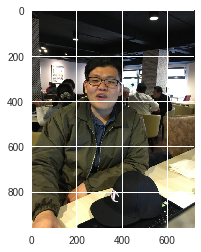

In [91]:
plt.imshow(cv_image)

In [0]:
#id_mat = np.arange(5,dtype=np.int)

#features_list = pd.DataFrame({'memebers': id_mat})
#print(features_list)
#features_list.to_csv(test_feature_dir, encoding='utf-8')


#dummy_coding = [0]*128
#member_features = []
#for i in range(0, 5):
    #member_features.append(list(dummy_coding))
#features_list = pd.DataFrame({'memebers': member_features})
#features_list.to_csv(test_feature_dir, encoding='utf-8')
#print(features_list)